# Programming Assignment 2
# LINEAR REGRESSION

Split the samples into 60% training, 20% validation, and 20% testing data at random



---



*   The code divides the dataset into three parts: training, validation, and testing
*   ensures that the model is trained on a sufficient portion of the data, validated on a separate portion to tune its performance, and finally tested on a completely unseen portion to evaluate its real-world accuracy. random_state=42 ensures consistent splits across different runs.





Validation MSE: 10.074997628409383
Test MSE: 7.891289980979108


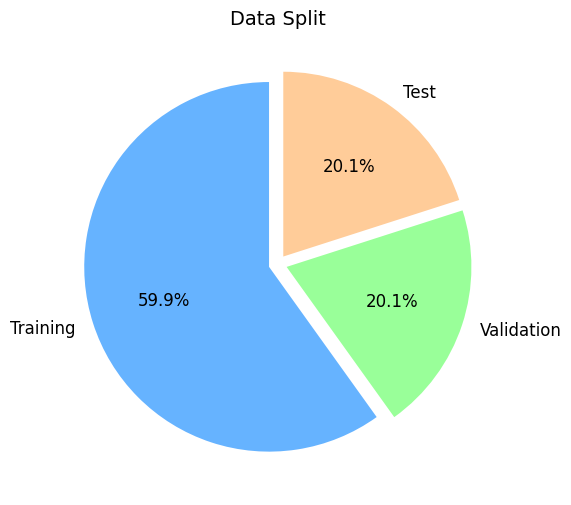

In [ ]:
!pip install openpyxl
!pip install colorama

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'
data = pd.read_excel(url)
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]  # Features
y = data['Y1']  # Target (Heating Load)

# 2. Split the data
# First split into train and remaining (validation + test)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.4, random_state=42)
# Then split the remaining into validation and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

# 3. Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Evaluate the model on the validation set
y_pred = model.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
print(f"Validation MSE: {mse}")

# 5. Evaluate the model on the test set
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")

# 6. Visualization: 2D Pie chart of data splits
# Pie charts are inherently 2D and are not suitable for 3D projection
sizes = [len(X_train), len(X_valid), len(X_test)]
labels = ['Training', 'Validation', 'Test']
colors = ['#66b3ff', '#99ff99', '#ffcc99']

fig, ax = plt.subplots(figsize=(6, 6))  # Create a 2D subplot

# Explode the slices slightly for better visibility
explode = (0.05, 0.05, 0.05)

ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,
       explode=explode, textprops={'fontsize': 12})

ax.set_title('Data Split', fontsize=14)

plt.show()

Using Ridge regularization with different choices of regularization parameters


---

*This part of the code focuses on improving the linear regression model using a technique called Ridge Regression and finding the best value for a parameter called alpha, which controls the strength of regularization.*

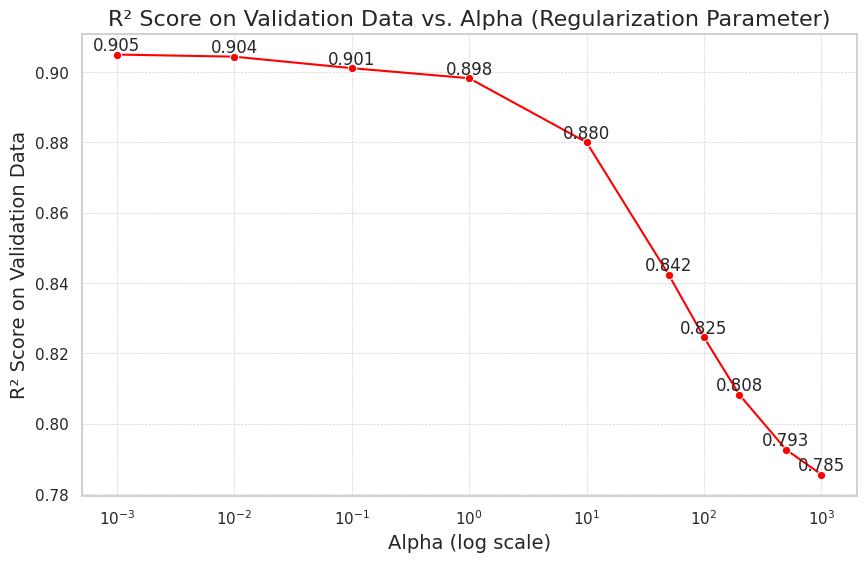

Best alpha: 0.001


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Define 10 different Ridge regularization parameters (alpha values)
alphas = [0.001, 0.01, 0.1, 1, 10, 50, 100, 200, 500, 1000]
validation_r2_scores = []

# Loop over each alpha and train the model, evaluate on validation data
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_val_pred = ridge.predict(X_val)
    r2 = r2_score(y_val, y_val_pred)
    validation_r2_scores.append(r2)

# Visualization: Plot R² scores for different regularization parameters
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Change line color to red
sns.lineplot(x=alphas, y=validation_r2_scores, marker='o', color='red')

plt.xscale('log')
plt.title('R² Score on Validation Data vs. Alpha (Regularization Parameter)', fontsize=16)
plt.xlabel('Alpha (log scale)', fontsize=14)
plt.ylabel('R² Score on Validation Data', fontsize=14)

# Customize grid color to a shade of gray that complements red
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

# Add data point labels
for i, alpha in enumerate(alphas):
    plt.text(alpha, validation_r2_scores[i], f'{validation_r2_scores[i]:.3f}', ha='center', va='bottom')

plt.show()
# Best alpha
best_alpha = alphas[validation_r2_scores.index(max(validation_r2_scores))]
print(f'Best alpha: {best_alpha}')

Final evaluation on the test data


---

*This code creates a bar chart to visually compare the R² scores obtained on the validation set (during hyperparameter tuning) and the test set (final evaluation).*

R² on test set: 0.9190947644935202


<ipython-input-13-a09f7a068602>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Validation', 'Test'], y=[max(validation_r2_scores), test_r2],


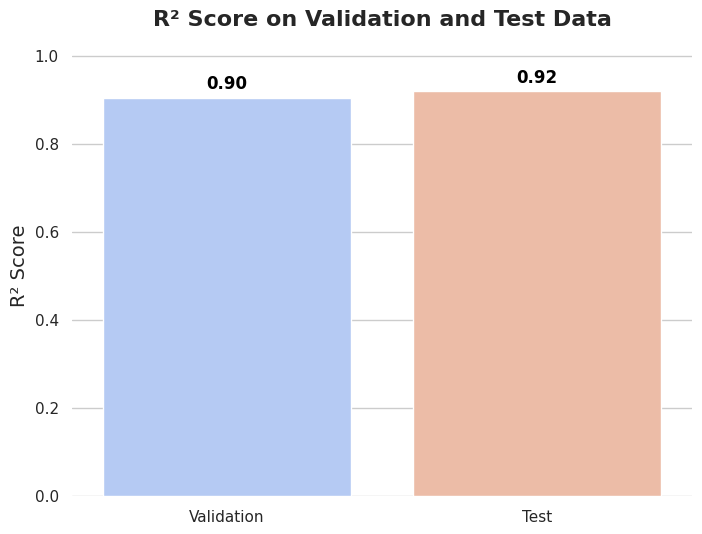

In [ ]:
# Train the Ridge model using the best alpha on the combined training and validation sets
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))

# Predict on test set and evaluate
y_test_pred = best_ridge.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

print(f'R² on test set: {test_r2}')

# Visualization: Bar chart showing R² score for validation and test sets
plt.figure(figsize=(8, 6))

# Use Seaborn for a more stylish bar plot
sns.set_theme(style="whitegrid")  # Set a theme for better aesthetics
ax = sns.barplot(x=['Validation', 'Test'], y=[max(validation_r2_scores), test_r2],
                 palette="coolwarm")  # Use a color palette

plt.title('R² Score on Validation and Test Data', fontsize=16, fontweight='bold')  # Bold title
plt.ylabel('R² Score', fontsize=14)

# Annotating the bars with improved formatting
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),  # Adjust vertical offset of annotation
                textcoords='offset points', fontsize=12, fontweight='bold', color='black')

plt.ylim(0, 1.05)  # Set y-axis limits for better visualization
sns.despine(left=True, bottom=True)  # Remove spines for a cleaner look

plt.show()

Best model’s coefficients, intercept, and accuracies (R² scores) for training, validation, and test sets


---

*This part of the code helps us understand the importance of each feature in the model by displaying its coefficient, provides a measure of model performance on different datasets using R² scores, and visualizes the impact of features through a bar chart of coefficients.*

Coefficients: [-6.55366574e+01 -6.12664973e-02  3.35417227e-02 -4.74043397e-02
  4.35503210e+00 -6.45989773e-03  2.00422014e+01  2.21752813e-01]
Intercept: 83.03387123696402
R² on training set: 0.9177795572678031
R² on validation set: 0.9077992149002307
R² on test set: 0.9190947644935202


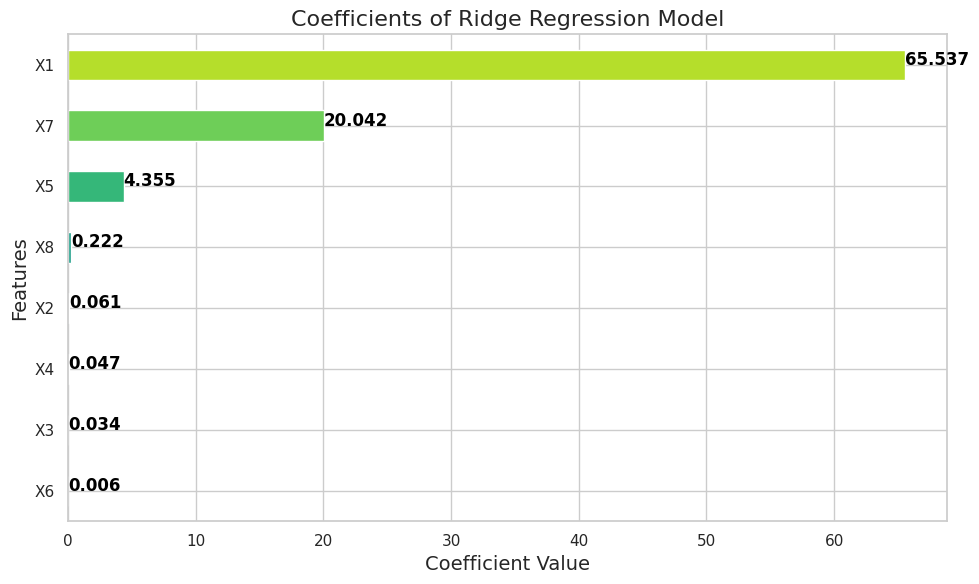

In [ ]:
# Coefficients and intercept of the best model
print('Coefficients:', best_ridge.coef_)
print('Intercept:', best_ridge.intercept_)

# R² score for training and validation sets
train_r2 = best_ridge.score(X_train, y_train)
val_r2 = best_ridge.score(X_val, y_val)

print(f'R² on training set: {train_r2}')
print(f'R² on validation set: {val_r2}')
print(f'R² on test set: {test_r2}')

# Visualization: Coefficients of the model with enhancements
import numpy as np  # Import numpy and assign it the alias 'np'
coefficients = pd.Series(best_ridge.coef_, index=X.columns)
plt.figure(figsize=(10, 6))

# Create a color palette with distinct colors
colors = sns.color_palette("viridis", len(coefficients))

# Sort coefficients by absolute value for better visualization
coefficients = coefficients.abs().sort_values() #Get absolute values and sort

# Create the horizontal bar plot
ax = coefficients.plot(kind='barh', color=colors)

# Add value labels to each bar
for i, v in enumerate(coefficients):
    ax.text(v + 0.01, i, str(round(v, 3)), color='black', fontweight='bold') # Adjusted for positive values

plt.title('Coefficients of Ridge Regression Model', fontsize=16) #Updated title
plt.xlabel('Coefficient Value', fontsize=14) #Updated x-axis label
plt.ylabel('Features', fontsize=14)

# Adjust layout for better readability
plt.tight_layout()
plt.show()

 Top 5 features based on their coefficients


---

*This code snippet aims to identify and visualize the top 5 most influential features in the Ridge Regression model. It does this by examining the coefficients assigned to each feature.*

Top 5 features: ['X1', 'X7', 'X5', 'X8', 'X2']


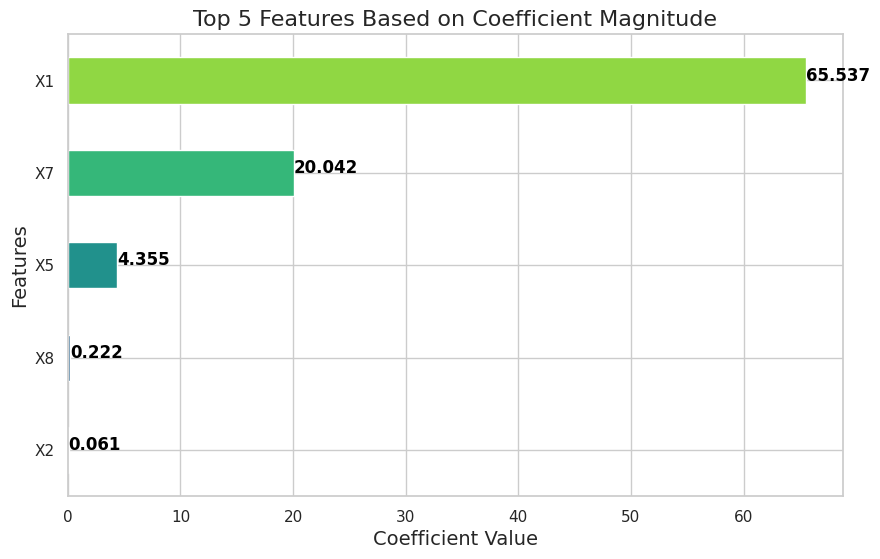

In [ ]:
# Get the top 5 features based on the absolute values of the coefficients
top_5_features = coefficients.abs().nlargest(5)
print('Top 5 features:', top_5_features.index.tolist())

# Visualization: Top 5 features with their coefficient values and enhancements
plt.figure(figsize=(10, 6))

# Generate a distinct color for each bar
colors = sns.color_palette('viridis', len(top_5_features))

# Create the horizontal bar plot
ax = top_5_features.sort_values().plot(kind='barh', color=colors)

plt.title('Top 5 Features Based on Coefficient Magnitude', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Add value labels to each bar
for i, v in enumerate(top_5_features.sort_values()):
    ax.text(v + 0.01, i, str(round(v, 3)), color='black', fontweight='bold')

plt.show()

Repeating the procedure using only the top 5


---

*In essence, this code aims to simplify the model and potentially improve its efficiency by focusing on the most influential features. It evaluates whether using only these top features can achieve comparable or even better performance compared to using all features.*

R² on validation set with top 5 features: 0.8988167172363036
R² on test set with top 5 features: 0.9071326495333917


<ipython-input-22-0a54d397442c>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Validation (All Features)', 'Test (All Features)',


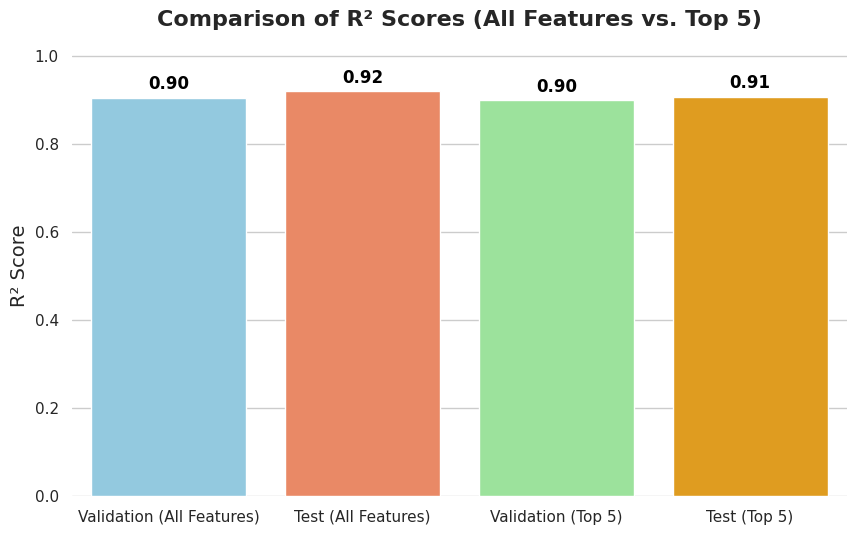

In [ ]:
# Select the top 5 features for retraining
X_top_5_train = X_train[top_5_features.index]
X_top_5_val = X_val[top_5_features.index]
X_top_5_test = X_test[top_5_features.index]

# Retrain the model using the top 5 features
ridge_top_5 = Ridge(alpha=best_alpha)
ridge_top_5.fit(X_top_5_train, y_train)

# Evaluate on validation and test sets
y_top_5_val_pred = ridge_top_5.predict(X_top_5_val)
y_top_5_test_pred = ridge_top_5.predict(X_top_5_test)

val_r2_top_5 = r2_score(y_val, y_top_5_val_pred)
test_r2_top_5 = r2_score(y_test, y_top_5_test_pred)

print(f'R² on validation set with top 5 features: {val_r2_top_5}')
print(f'R² on test set with top 5 features: {test_r2_top_5}')

import seaborn as sns

# Visualization: Comparison of R² scores using all features and top 5 features
plt.figure(figsize=(10, 6))

# Define custom colors for the bars
colors = ['skyblue', 'coral', 'lightgreen', 'orange']

# Create the bar plot using Seaborn for better aesthetics
ax = sns.barplot(x=['Validation (All Features)', 'Test (All Features)',
                   'Validation (Top 5)', 'Test (Top 5)'],
                 y=[max(validation_r2_scores), test_r2,
                   val_r2_top_5, test_r2_top_5],
                 palette=colors)  # Apply custom colors

plt.title('Comparison of R² Scores (All Features vs. Top 5)', fontsize=16, fontweight='bold')
plt.ylabel('R² Score', fontsize=14)

# Add value labels to each bar with improved formatting
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),  # Adjust vertical offset of annotation
                textcoords='offset points', fontsize=12, fontweight='bold', color='black')

plt.ylim(0, 1.05)  # Set y-axis limits for better visualization
sns.despine(left=True, bottom=True)  # Remove spines for a cleaner look

plt.show()

## **GUIDED QUESTION**

**What is the impact of removing certain features on the model’s performance?**

---


*Removing features can improve, reduce, or have minimal impact on a model's performance. If removed features are irrelevant or redundant, performance may improve by reducing overfitting and increasing efficiency. However, removing important features can harm performance by causing underfitting and lowering accuracy. The impact ultimately depends on the dataset and feature importance to the prediction task.*



---

*This code section compares the performance of a Ridge Regression model trained with all features versus a model trained with only the top 5 features. It uses the R² score as the performance metric and visualizes the comparison using a bar chart. This helps to understand the impact of feature selection on the model's predictive ability*


R² score on test data using all features: 0.9190947644935202
R² score on test data using top 5 features: 0.9071326495333917


<ipython-input-24-516cbea2e449>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['All Features', 'Top 5 Features'],


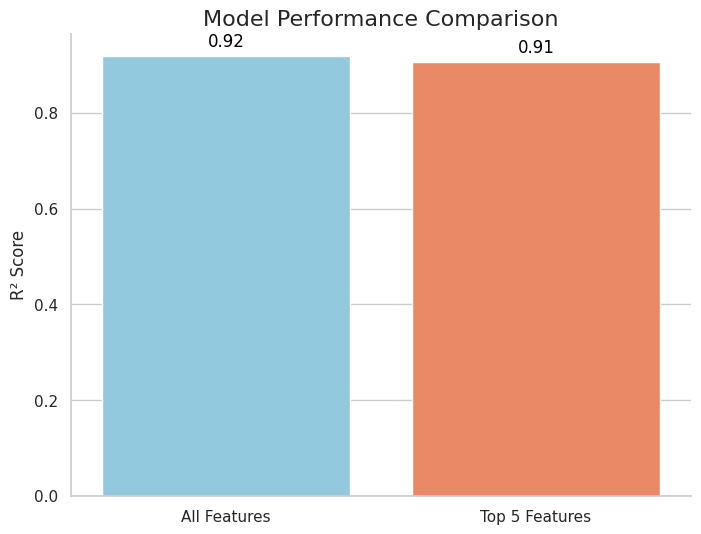

In [ ]:
from sklearn.metrics import r2_score

# Model trained with all features (already trained)
test_r2_all = r2_score(y_test, y_test_pred)

# Model trained with top 5 features
ridge_top_5 = Ridge(alpha=best_alpha)
ridge_top_5.fit(X_top_5_train, y_train)
y_top_5_test_pred = ridge_top_5.predict(X_top_5_test)
test_r2_top_5 = r2_score(y_test, y_top_5_test_pred)

print(f'R² score on test data using all features: {test_r2_all}')
print(f'R² score on test data using top 5 features: {test_r2_top_5}')

# Visualization: Comparison of R² scores using all features and top 5 features
plt.figure(figsize=(8, 6))

# Define custom colors for the bars
colors = ['skyblue', 'coral']  # Distinct colors for better contrast

# Create the bar plot using Seaborn for better aesthetics
ax = sns.barplot(x=['All Features', 'Top 5 Features'],
                 y=[test_r2_all, test_r2_top_5],
                 palette=colors)  # Apply custom colors

# Add a title
plt.title('Model Performance Comparison', fontsize=16)

# Label the y-axis
plt.ylabel('R² Score', fontsize=12)

# Remove top and right spines for a cleaner look
sns.despine(top=True, right=True)

# Add value labels to the bars for better readability
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),  # Adjust vertical offset of annotation
                textcoords='offset points', fontsize=12, color='black')

# Show the plot
plt.show()

**Why is it necessary to split the data into training, validation, and testing sets? What could happen if this step is skipped?**


---

*Splitting data is crucial to ensure the model learns general patterns, not just memorizes the training data. Without separate training, validation, and testing sets, the model could overfit, becoming highly accurate on training data but failing on new, unseen data. We also wouldn't be able to tune the model's settings for optimal performance or reliably assess its real-world accuracy. Essentially, skipping the split leads to an unreliable and potentially useless model for practical applications.*

Validation MSE: 10.074997628409383
Test MSE: 7.891289980979108


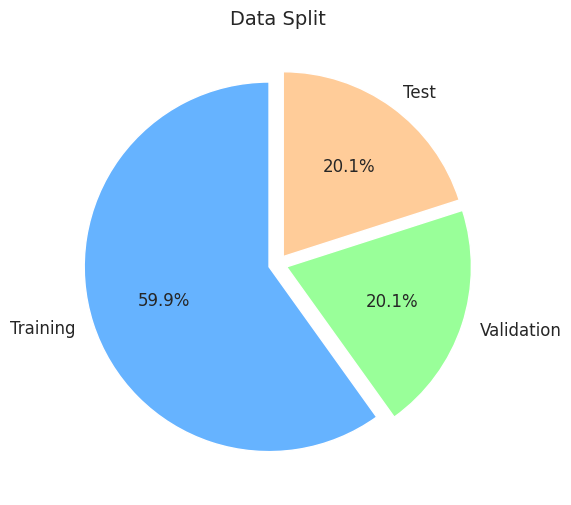

In [ ]:
# 2. Split the data
# First split into train and remaining (validation + test)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.4, random_state=42)
# Then split the remaining into validation and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

# 3. Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Evaluate the model on the validation set
y_pred = model.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
print(f"Validation MSE: {mse}")

# 5. Evaluate the model on the test set
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")

# 6. Visualization: 2D Pie chart of data splits
# Pie charts are inherently 2D and are not suitable for 3D projection
sizes = [len(X_train), len(X_valid), len(X_test)]
labels = ['Training', 'Validation', 'Test']
colors = ['#66b3ff', '#99ff99', '#ffcc99']

fig, ax = plt.subplots(figsize=(6, 6))  # Create a 2D subplot

# Explode the slices slightly for better visibility
explode = (0.05, 0.05, 0.05)

ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,
       explode=explode, textprops={'fontsize': 12})

ax.set_title('Data Split', fontsize=14)

plt.show()

**How can the generalization ability of the model be assessed using the test data? What steps would you take to ensure the model generalizes well to unseen data?**


---
*The model's generalization ability is assessed by evaluating its performance on the held-out test data, using metrics like the R² score. A high R² score on the test data indicates good generalization. To ensure good generalization, employ techniques like using a sufficiently large and diverse dataset, applying regularization, performing cross-validation, and avoiding overfitting the training data. By carefully validating and tuning the model, it's more likely to perform well on new, unseen data.*


R² on test set: 0.9190947644935202


<ipython-input-26-a09f7a068602>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Validation', 'Test'], y=[max(validation_r2_scores), test_r2],


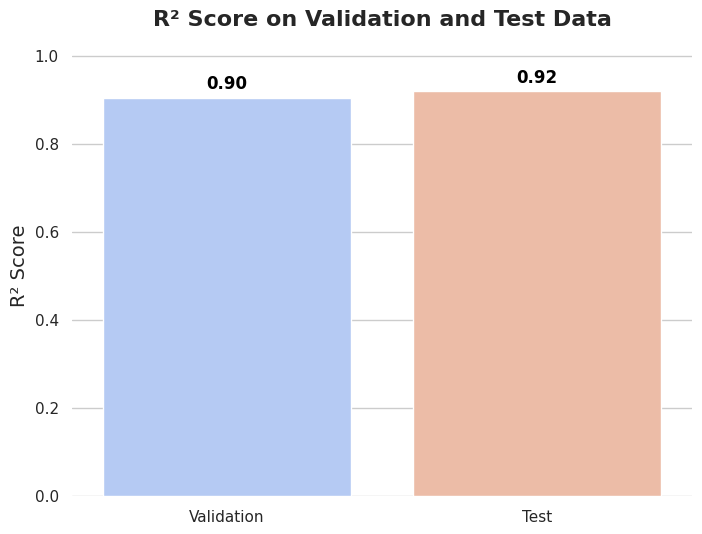

In [ ]:
# Train the Ridge model using the best alpha on the combined training and validation sets
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))

# Predict on test set and evaluate
y_test_pred = best_ridge.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

print(f'R² on test set: {test_r2}')

# Visualization: Bar chart showing R² score for validation and test sets
plt.figure(figsize=(8, 6))

# Use Seaborn for a more stylish bar plot
sns.set_theme(style="whitegrid")  # Set a theme for better aesthetics
ax = sns.barplot(x=['Validation', 'Test'], y=[max(validation_r2_scores), test_r2],
                 palette="coolwarm")  # Use a color palette

plt.title('R² Score on Validation and Test Data', fontsize=16, fontweight='bold')  # Bold title
plt.ylabel('R² Score', fontsize=14)

# Annotating the bars with improved formatting
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),  # Adjust vertical offset of annotation
                textcoords='offset points', fontsize=12, fontweight='bold', color='black')

plt.ylim(0, 1.05)  # Set y-axis limits for better visualization
sns.despine(left=True, bottom=True)  # Remove spines for a cleaner look

plt.show()